___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Principal Component Analysis

Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).

## PCA Review

Make sure to watch the video lecture and theory presentation for a full overview of PCA! 
Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. For example:

<img src='PCA.png' />

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [11]:
from sklearn.preprocessing import StandardScaler

In [8]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
..           ...           ...             ...        ...              ...   
539        7.691         25.44           48.34      170.4          0.08668   
540       11.540         14.44           74.65      402.9          0.09984   
541       14.470         24.99           95.81      656.4          0.08837   
542       14.740         25.42           94.70      668.6          0.08275   
543       13.210         28.06           84.88      538.4          0.08671   
544       13.870         20.70           89.77      584.8          0.09578   
545       13.620         23.23           87.19      573.2          0.09246   
546       10.320         16.35           65.31      324.9          0.09434   
547       10.260         16.58           65.85      320.8          0.08877   
548        9.683         19.34           61.05      285.7          0.08491   
549       10.820         24.21           68.89      361.6          0.08192   
550       10.860         21.48           68.51      360.5          0.07431   
551       11.130         22.44           71.49      378.4          0.09566   
552       12.770         29.43           81.35      507.9          0.08276   
553        9.333         21.94           59.01      264.0          0.09240   
554       12.880         28.92           82.50      514.3          0.08123   
555       10.290         27.61           65.67      321.4          0.09030   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22

In [12]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_data = scaler.transform(df)

In [16]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
pca.fit(scaled_data)

PCA(copy=True, n_components=2, whiten=False)

Now we can transform this data to its first 2 principal components.

In [37]:
x_pca = pca.transform(scaled_data)

In [38]:
scaled_data.shape

(569, 30)

In [39]:
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

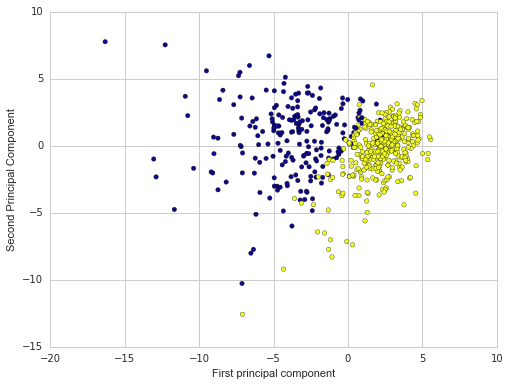

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [55]:
pca.components_

array([[-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
        -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
        -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
        -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
        -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
        -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394],
       [ 0.23385713,  0.05970609,  0.21518136,  0.23107671, -0.18611302,
        -0.15189161, -0.06016536,  0.0347675 , -0.19034877, -0.36657547,
         0.10555215, -0.08997968,  0.08945723,  0.15229263, -0.20443045,
        -0.2327159 , -0.19720728, -0.13032156, -0.183848  , -0.28009203,
         0.21986638,  0.0454673 ,  0.19987843,  0.21935186, -0.17230435,
        -0.14359317, -0.09796411,  0.00825724, -0.14188335, -0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

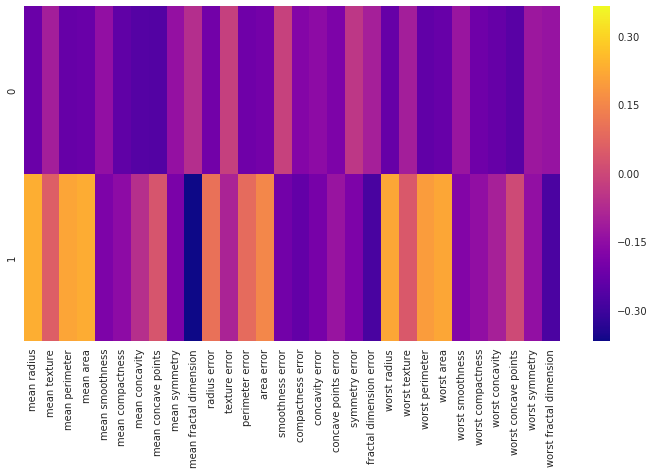

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

# Great Job!